In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import surprise


from collections import defaultdict
from surprise.accuracy import rmse, mae
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV, cross_validate
from surprise import Reader, Dataset, dump, \
KNNBasic, KNNWithZScore, KNNWithMeans, \
SVD, SVDpp, SlopeOne, CoClustering, NormalPredictor





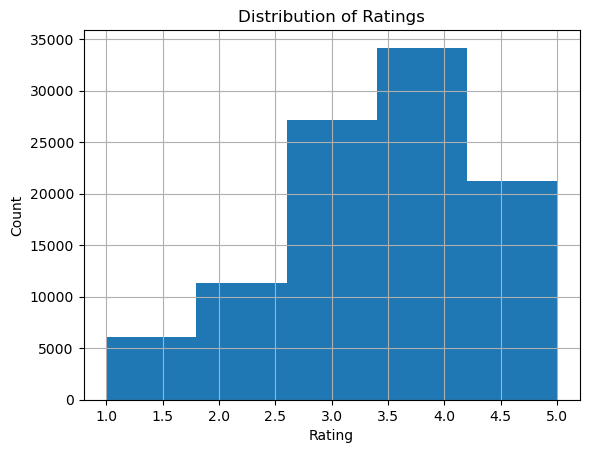

In [2]:
# Load the data
datapath = "C:\\Users\\arham\Downloads\\ml-100k (2)\\ml-100k\\"
movies_df = pd.read_csv(datapath + "u.item", sep='|', header=None, encoding='iso-8859-1', usecols=[0, 1, *range(5, 24)], names=['movie_id', 'movie_title', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
ratings_df = pd.read_csv(datapath + "u.data", sep='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Merge movie titles with the data
data = pd.merge(ratings_df, movies_df, on='movie_id')

# Plot the distribution of ratings
data['rating'].hist(bins=5)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()



In [3]:
movies_df

,movie_id,movie_title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
ratings_df

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [5]:
data

,user_id,movie_id,rating,timestamp,movie_title,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,655,1640,3,888474646,"Eighth Day, The (1996)",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,655,1637,3,888984255,Girls Town (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Filter data

In [6]:
# Set minimum number of ratings for a movie and a user
min_movie_ratings = 3
min_user_ratings = 5

# Filter out movies and users with too few ratings
data = data.groupby("movie_id").filter(lambda x: x['movie_id'].count() >= min_movie_ratings)
data = data.groupby("user_id").filter(lambda x: x['user_id'].count() >= min_user_ratings)


# Data Preperation for Surprise Library

In [7]:
# Define the rating scale
reader = Reader(rating_scale=(1, 5))

# Load the data into Surprise dataset format
data = Dataset.load_from_df(data[['user_id', 'movie_id', 'rating']], reader)

# Build the full training set
trainset = data.build_full_trainset()

# Build the test set
testset = trainset.build_anti_testset()


# Comparing Different Algorithms for least cost

SlopeOne: This algorithm is a simple and efficient collaborative filtering algorithm that predicts the rating of an item by calculating the average difference in ratings between pairs of items that are rated together by a user.

NormalPredictor: This algorithm is a basic algorithm that predicts the rating of an item based on the average rating of all the items in the training data. It does not take into account any user or item information.

CoClustering: This algorithm is a collaborative filtering algorithm that clusters both users and items based on their ratings, and then predicts the ratings of users based on the cluster to which they belong and the items in that cluster. It can be more effective than other algorithms when the data is sparse or when there are many users or items.

In [8]:
# Define a list of algorithm objects
algorithms = [SVD(), SlopeOne(), NormalPredictor(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), CoClustering()]

# Use list comprehension and numpy to perform cross validation on all algorithms
cv_results = []

for algorithm in algorithms:
    result = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)
    mean_fit_time = np.mean(result['fit_time'])
    mean_test_time = np.mean(result['test_time'])
    mean_rmse = np.mean(result['test_rmse'])
    mean_mae = np.mean(result['test_mae'])
    cv_results.append((algorithm.__class__.__name__, mean_rmse, mean_mae, mean_fit_time, mean_test_time))
    
# Create a pandas dataframe from the cross validation results
df_results = pd.DataFrame(cv_results, columns=['Algorithm', 'RMSE', 'MAE', 'Fit Time', 'Test Time'])

# Print the results
print(df_results)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
         Algorithm      RMSE       MAE  Fit Time  Test Time
0              SVD  0.945139  0.746048  4.846881   0.361772
1         SlopeOne  0.945207  0.743714  0.610410   4.427850
2  NormalPredictor  1.521305  1.221327  0.158060   0.389901
3         KNNBasic  0.985088  0.778796  0.497689   5.715586
4     KNNWithMeans  0.953974  0.752425  0.5

In [36]:
df_results


,Algorithm,RMSE,MAE,Fit Time,Test Time
0,SVD,0.945139,0.746048,4.846881,0.361772
1,SlopeOne,0.945207,0.743714,0.610410,4.427850
2,NormalPredictor,1.521305,1.221327,0.158060,0.389901
3,KNNBasic,0.985088,0.778796,0.497689,5.715586
4,KNNWithMeans,0.953974,0.752425,0.570955,6.058610
5,KNNWithZScore,0.954870,0.749797,0.581074,5.761776
6,CoClustering,0.970366,0.760516,2.620780,0.286798


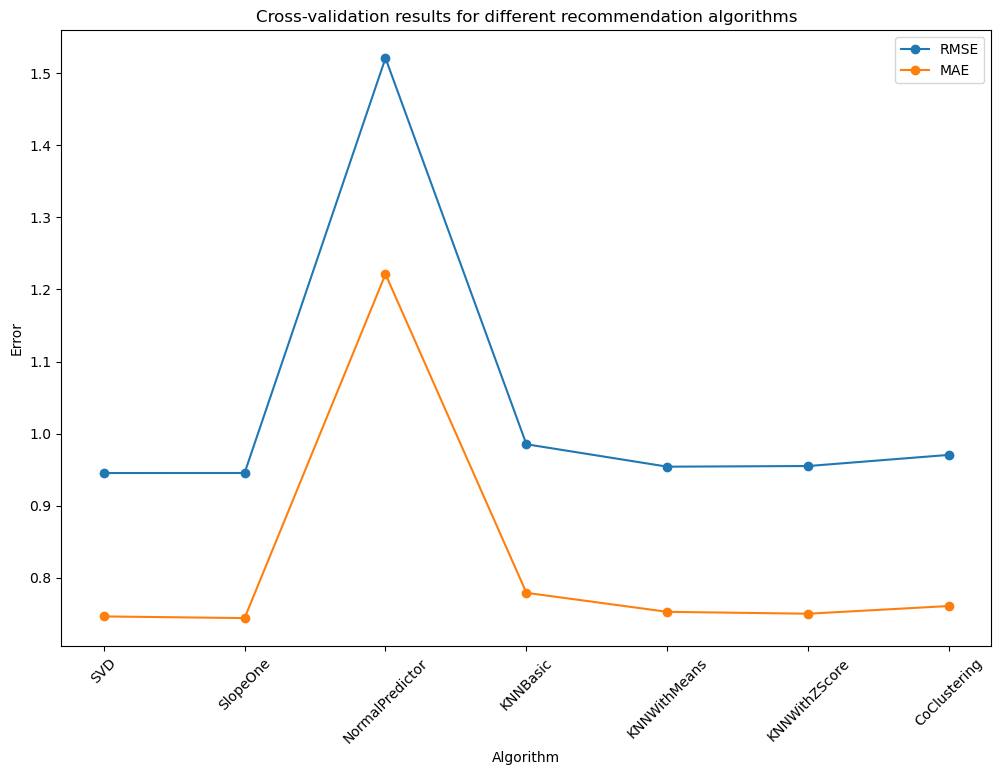

In [9]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the RMSE and MAE scores as two separate lines on the same axis
df_results.plot(kind='line', x='Algorithm', y='RMSE', marker='o', label='RMSE', ax=ax)
df_results.plot(kind='line', x='Algorithm', y='MAE', marker='o', label='MAE', ax=ax)

# Set the title and axis labels
ax.set_title('Cross-validation results for different recommendation algorithms')
ax.set_xlabel('Algorithm')
ax.set_ylabel('Error')

# Set the legend and rotate the x-axis labels
ax.legend()
plt.xticks(rotation=45)

# Show the plot
plt.show()


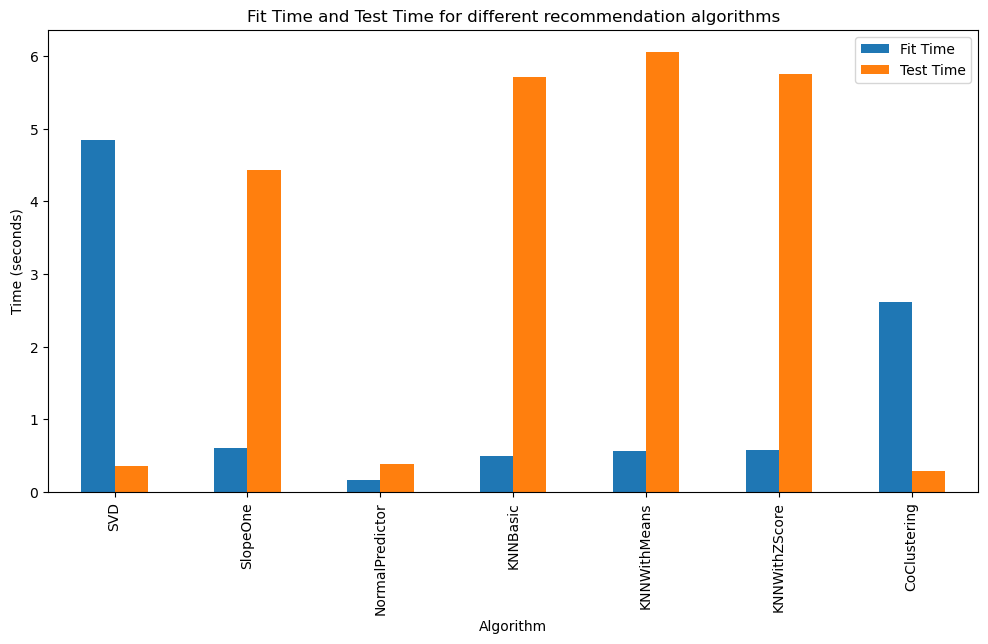

In [10]:
# Plot the Fit Time and Test Time columns
df_results.plot(kind='bar', x='Algorithm', y=['Fit Time', 'Test Time'], figsize=(12, 6))

# Set the title and axis labels
plt.title('Fit Time and Test Time for different recommendation algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Time (seconds)')

# Show the plot
plt.show()


# Optimizing k-values for SVD

In [11]:
# Define a function to calculate RMSE for different number of factors
def rmse_vs_factors(algorithm, data):
    rmse_algorithm = []
    for k in range(1, 101, 1):
        algo = algorithm(n_factors=k)
        loss = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean()
        rmse_algorithm.append(loss)
    return rmse_algorithm

# Calculate RMSE for SVD
rmse_svd = rmse_vs_factors(SVD, data)89-


In [19]:
def plot_rmse(rmse, algorithm):

    fig, axs = plt.subplots(2, 1, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')
    
    axs[0].plot(rmse)
    axs[0].set_xlim(0, 100)
    axs[0].set_title("{0} Performance: RMSE Against Number of Factors".format(algorithm), size=20)
    axs[0].set_ylabel("Mean RMSE (cv=5)")
    
    axs[1].plot(rmse)
    axs[1].set_xlim(0, 70)
    axs[1].set_xticks(np.arange(0, 70, step=2))
    axs[1].set_xlabel("{0}(n_factor = k)".format(algorithm))
    axs[1].set_ylabel("Mean RMSE (cv=5)")
    axs[1].axvline(np.argmin(rmse), color="r")
    
    plt.tight_layout()
    plt.show()
    


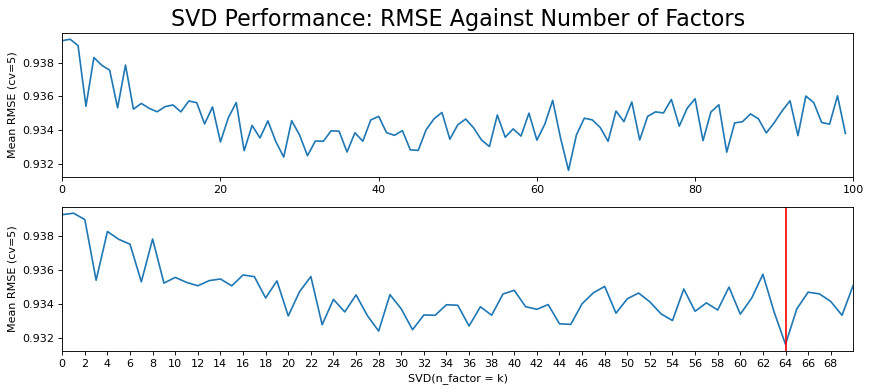

In [20]:
plot_rmse(rmse_svd,"SVD")


# Grid Search

In [21]:
param_grid = {'n_factors': [17,20,23,28,31,36,44,54,64]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])




0.9325056778972511
{'n_factors': 44}


# Find Predictions

In [44]:
from surprise import accuracy
# k = 44 gives the best rmse score
algo = SVD(n_factors = 44)
algo.fit(trainset)

testset = trainset.build_anti_testset()
predictions_SVD = algo.test(testset)

accuracy.rmse(predictions_SVD, verbose=True)


RMSE: 0.6367


0.6367089565523197

The following variables from the surprise library mean the following
uid: User item, iid: item id, r_ui (float): the true rating, est (float): estimated rating 

In [45]:
def get_top_n(predictions, user_id, movies_df, ratings_df, n = 10):

    # for 1 and 2, this code was shown in Surprise Documentation 
    
    #1. First map the predictions to each user.
    top_n = defaultdict(list)
    # The following are parameters in predictions
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    #2. Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[: n ]
        
    #3. Tells how many movies the user has already rated
    user_data = ratings_df[ratings_df.user_id == (user_id)]
    print('User {0} has already rated {1} movies.'.format(user_id, user_data.shape[0]))

    
    #4. Data Frame with predictions. 
    preds_df = pd.DataFrame([(id, pair[0],pair[1]) for id, row in top_n.items() for pair in row], columns=["user_id" ,"movie_id","rat_pred"])
    
    
    #5. Return pred_usr, i.e. top N recommended movies with (merged) titles and genres. 
    pred_usr = preds_df[preds_df["user_id"] == (user_id)].merge(movies_df, how = 'left', left_on = 'movie_id', right_on = 'movie_id')
            
    #6. Return hist_usr, i.e. top N historically rated movies with (merged) titles and genres for holistic evaluation
    hist_usr = ratings_df[ratings_df.user_id == (user_id) ].sort_values("rating", ascending = False).merge\
    (movies_df, how = 'left', left_on = 'movie_id', right_on = 'movie_id')
    
    
    return hist_usr, pred_usr

user_number = int(input("Enter your user_id: "))
user_history, user_recommendations = get_top_n(predictions_SVD, user_number,movies_df = movies_df,  ratings_df = ratings_df)

Enter your user_id: 10
User 10 has already rated 184 movies.


# Example Output for user 10

In [46]:
user_number = int(input("Enter your user_id: "))
user_history, user_recommendations = get_top_n(predictions_SVD, user_number,movies_df = movies_df,  ratings_df = ratings_df)

Enter your user_id: 10
User 10 has already rated 184 movies.


In [47]:
user_history

,user_id,movie_id,rating,timestamp,movie_title,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,10,478,5,877889004,"Philadelphia Story, The (1940)",0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,10,654,5,877886597,Chinatown (1974),0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,10,200,5,877889261,"Shining, The (1980)",0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,10,223,5,877888545,Sling Blade (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10,510,5,877892209,"Magnificent Seven, The (1954)",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,10,529,3,877892438,My Life as a Dog (Mitt liv som hund) (1985),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,10,319,3,877886223,Everyone Says I Love You (1996),0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
181,10,695,3,877892050,Kicking and Screaming (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,10,60,3,877892110,Three Colors: Blue (1993),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
user_recommendations

,user_id,movie_id,rat_pred,movie_title,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,10,318,4.954421,Schindler's List (1993),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,10,408,4.805865,"Close Shave, A (1995)",0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,10,114,4.729805,Wallace & Gromit: The Best of Aardman Animatio...,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,272,4.711239,Good Will Hunting (1997),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,923,4.665162,Raise the Red Lantern (1991),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,10,641,4.650546,Paths of Glory (1957),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,10,963,4.650165,Some Folks Call It a Sling Blade (1993),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,10,190,4.618651,Henry V (1989),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,10,427,4.603682,To Kill a Mockingbird (1962),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,172,4.603425,"Empire Strikes Back, The (1980)",0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0


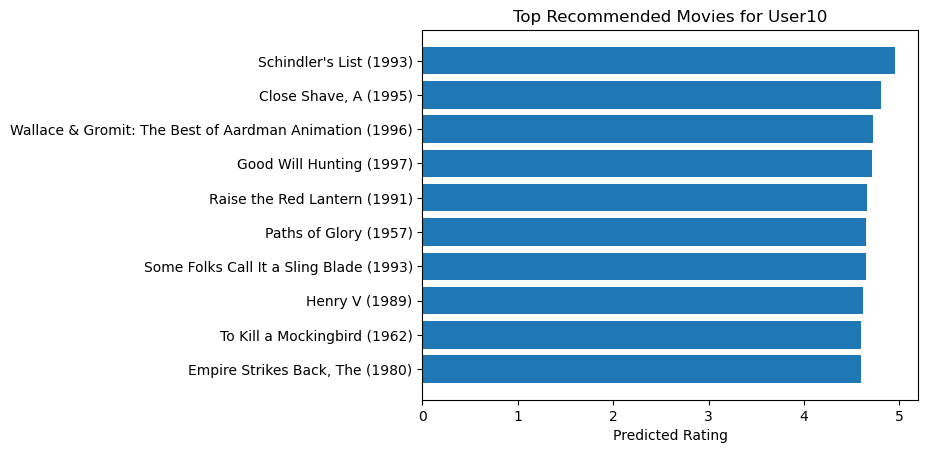

In [49]:
# Plot the top recommended movies for a given user
fig, ax = plt.subplots()
ax.barh(user_recommendations['movie_title'], user_recommendations['rat_pred'])
ax.invert_yaxis()
ax.set_xlabel('Predicted Rating')
ax.set_ylabel('')
ax.set_title('Top Recommended Movies for User' + str(user_number))
plt.show()


# 